In [65]:
import pandas as pd
import numpy as np
from datetime import timezone, timedelta
import os
from lxml import etree
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
import seaborn as sns

# Nike Running Club Data Extraction and Cleaning 

Data is stored in .tcx format. Time in UTC timezone.

In [2]:
def get_extension(trackpoint, tag, ns_prefix):
    ext = trackpoint.find('.//tcx:Extensions', ns)
    if ext is not None:
        value = ext.find(f'.//{ns_prefix}:{tag}', ns)
        if value is not None:
            return float(value.text)
    return None
ns = {
        'tcx': 'http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2',
        'nax': 'http://www.nike.com/xmlschemas/ActivityExtension/v2',
        'ns3': 'http://www.garmin.com/xmlschemas/ActivityExtension/v2' 
    }


def get_data_from_file(file_name):
    global ID_GENERATOR
    parser = etree.XMLParser(recover=True)
    tree = ET.parse(file_name, parser)
    root = tree.getroot()
    
    
    data = []
    print(root.findall('.//tcx:Trackpoint', ns)[0].find('tcx:Time', ns).text)
    for tp in root.findall('.//tcx:Trackpoint', ns):
        time = tp.find('tcx:Time', ns)
        altitude = tp.find('tcx:AltitudeMeters', ns)
        distance = tp.find('.//tcx:DistanceMeters', ns)
    
        if time is not None:
            altitude_value = float(altitude.text) if altitude is not None else None
            distance_value = float(distance.text) if distance is not None else None
    
            speed = get_extension(tp, 'Speed', 'ns3')  # Speed in m/s
    
            data.append({
                'time': time.text,
                'altitude': altitude_value,
                'distance': distance_value,
                'speed_m_s': speed,
                'pace': '',
                'speed_km_h': speed * 3.6 if speed else None
            })
    
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').reset_index(drop=True)
    
    df['duration'] = (df['time'] - df['time'].iloc[0]).dt.total_seconds()
    df['pace'] = (1 / df['speed_km_h']) * 60
    df['id'] = file_name
    
    return df[['id', 'time', 'distance', 'altitude', 'pace', 'speed_m_s', 'speed_km_h']]


In [3]:
#collecting data from .tcx files
file_list = os.listdir('nike')
df_nike = pd.DataFrame()
for file in file_list:
    if '.tcx' in file: 
        print(f'getting data from file: nike/{file}')
        df_tmp = get_data_from_file(f'nike/{file}')
        df_nike = pd.concat([df_nike, df_tmp])

getting data from file: nike/64066c25-f3df-45ab-be28-d2dd11cad2e6.tcx

      2023-07-06T02:34:51.730Z
    
getting data from file: nike/b1f7fd54-0b97-4778-bc5d-d13dda042be4.tcx

      2024-12-09T06:35:50.912Z
    
getting data from file: nike/3d8cfc70-3b10-4365-af6a-b51e48e1fa46.tcx

      2025-02-05T06:41:00.417Z
    
getting data from file: nike/e429eb21-30a1-4b4c-a6d1-a72d88507bb4.tcx

      2025-02-14T06:31:19.370Z
    
getting data from file: nike/b18b964f-400f-4d5a-8f22-5d963c121e37.tcx

      2024-01-16T05:57:03.143Z
    
getting data from file: nike/edbecd35-9ec1-4ca0-90fa-223ab953de05.tcx

      2025-02-22T08:16:46.936Z
    
getting data from file: nike/2ed43f3f-a5a8-40f2-b634-3d6783b8e166.tcx

      2024-02-14T05:25:03.429Z
    
getting data from file: nike/f3b9dc4c-256d-45da-9e68-6caf1631f2ff.tcx

      2023-06-09T14:42:51.658Z
    
getting data from file: nike/99c46a13-f44c-4503-9e74-755467371302.tcx

      2023-07-15T15:57:49.036Z
    
getting data from file: nike/2e4931a3

/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])


getting data from file: nike/2cc9f391-b8d4-44c5-a170-b8438a327049.tcx

      2023-04-28T07:30:13.084Z
    
getting data from file: nike/77ceff59-0c49-4bdd-9f32-222f21bb52e8.tcx

      2023-05-26T16:02:28.134Z
    
getting data from file: nike/81d39eb7-2d37-467a-9b84-90c4498ed1df.tcx

      2023-07-02T11:23:55.816Z
    
getting data from file: nike/3124c280-5b2b-4875-84ef-3288d5624a5e.tcx

      2019-04-22T16:50:50.705Z
    
getting data from file: nike/eda2a2f0-d19c-4e7f-8142-4584d8a4e0c5.tcx

      2025-01-23T17:07:44.949Z
    
getting data from file: nike/6ee15251-fadd-4a8d-8873-b9a80a303a05.tcx

      2023-06-27T11:26:20.654Z
    
getting data from file: nike/a8a6ae8a-7fb6-40fa-b9da-bd373887946a.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])



      2023-05-13T09:37:45.107Z
    
getting data from file: nike/837d6cd8-e5a0-4876-b17f-5abdd4340795.tcx

      2024-01-18T06:51:25.064Z
    
getting data from file: nike/3febf402-4320-4fe3-9994-9fb0ecf4b8f3.tcx

      2023-05-22T13:45:10.644Z
    
getting data from file: nike/eaceb81f-ca93-4517-ab1a-2f381693066a.tcx

      2023-10-29T06:21:31.029Z
    
getting data from file: nike/f5e4226d-5934-4aa7-aa73-cb662d4421ae.tcx

      2024-03-13T16:56:15.762Z
    
getting data from file: nike/f2bb7790-15f7-41aa-affe-aedae80257ee.tcx

      2024-02-01T19:11:27.127Z
    
getting data from file: nike/84c6f670-e47c-48d0-91e0-73e665e15250.tcx

      2023-05-18T16:50:13.152Z
    
getting data from file: nike/0cfd2a9c-b0f3-4061-9a53-cb401e3dbbcd.tcx

      2020-09-05T15:32:25.669Z
    
getting data from file: nike/b1a91aaa-7576-404d-b209-4865d4a7b039.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])



      2023-06-22T17:14:59.365Z
    
getting data from file: nike/b058b3e1-08eb-412b-9ece-b18502a0d104.tcx

      2022-08-13T06:17:00.575Z
    
getting data from file: nike/522a3737-734d-4408-9805-cf35a9d8c8e8.tcx

      2024-12-04T07:27:57.631Z
    
getting data from file: nike/9ab50eb3-9f1d-485c-bb4e-f359627f9146.tcx

      2024-12-18T18:12:03.778Z
    
getting data from file: nike/6686cfa0-3d0e-4fa9-b14a-4e60be52f4b9.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])



      2019-04-13T16:30:07.686Z
    
getting data from file: nike/b417fb36-cc2a-43ba-9c98-8025bef1dc8e.tcx

      2022-11-26T13:41:31.227Z
    
getting data from file: nike/cf84e889-1db2-44ae-99dc-34b69c6341a1.tcx

      2024-03-07T05:54:47.903Z
    
getting data from file: nike/2674871b-f6c8-427a-a865-5aad8e8ed567.tcx

      2019-07-07T09:38:55.000Z
    
getting data from file: nike/40255444-5322-44b3-8455-3a992b000d71.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])



      2025-02-12T07:14:08.340Z
    
getting data from file: nike/23928850-5e98-4489-85bf-4aa632efc844.tcx

      2024-03-01T15:45:46.995Z
    
getting data from file: nike/5fcad8e4-2d13-4801-92fe-f7fa03d01daf.tcx

      2022-10-10T17:36:56.371Z
    
getting data from file: nike/b3198756-dafd-4a8a-9ac8-ec8921c64807.tcx

      2019-04-16T16:19:02.001Z
    
getting data from file: nike/c6349372-4b16-465f-8149-5b7868531ea4.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])



      2025-01-29T07:06:07.608Z
    
getting data from file: nike/38ed6310-7177-40fb-ab81-ac468fca0770.tcx

      2024-09-22T14:25:30.002Z
    
getting data from file: nike/fb63d6e4-076a-47fd-afa5-b24eba76c6e2.tcx

      2022-06-22T16:14:16.294Z
    
getting data from file: nike/73b89e4e-309a-48f0-9536-a16997c3fbb0.tcx

      2022-10-30T14:17:06.014Z
    
getting data from file: nike/dd3f19bf-9f79-4d67-962f-c7a2024e4dfa.tcx

      2024-02-05T05:59:33.362Z
    
getting data from file: nike/9bb45986-4234-4f60-b9bd-70b1986d41e2.tcx

      2023-07-30T10:18:40.496Z
    
getting data from file: nike/5173cfcd-a1f6-437e-8ec2-9a5403e19b86.tcx

      2020-12-05T07:48:26.216Z
    
getting data from file: nike/aadf6c88-dc42-42ae-ac92-81bfbcf3148a.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])



      2023-10-21T05:23:14.777Z
    
getting data from file: nike/3a5fdb87-c8c6-4d4a-bfb7-40133268ac62.tcx

      2025-02-09T07:31:02.945Z
    
getting data from file: nike/0445603a-27dd-4570-a0d9-b7078e708b33.tcx

      2024-01-14T14:26:16.753Z
    
getting data from file: nike/6ba56bb7-6413-4cae-a3eb-25a096e6af40.tcx

      2024-11-25T06:16:50.780Z
    
getting data from file: nike/d186c5d2-0d74-4a2b-8e36-4e4f2249cf47.tcx

      2025-01-29T07:39:15.731Z
    
getting data from file: nike/719f8ff3-8761-4804-b2df-f883e64af210.tcx

      2023-06-22T16:36:47.270Z
    
getting data from file: nike/d2443bdc-699d-407c-b555-81212e91a35d.tcx

      2019-07-04T01:10:15.836Z
    
getting data from file: nike/28198a0a-e53f-4e6a-9443-b072a1e9e225.tcx

      2025-02-16T06:56:03.150Z
    
getting data from file: nike/c98d212a-9004-49cd-84d5-7a4a4910f9c2.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])



      2022-06-29T16:11:19.247Z
    
getting data from file: nike/5b185971-2dfb-4835-8b5c-e506f150e247.tcx

      2023-05-23T17:21:39.717Z
    
getting data from file: nike/e8289c0c-355c-4871-8693-73ec36ad3d4e.tcx

      2024-09-08T16:33:28.560Z
    
getting data from file: nike/2ae99513-64a6-4b5f-9e48-3fe89bd69590.tcx

      2023-10-21T05:24:54.490Z
    
getting data from file: nike/d39d9f19-7212-4b77-95ef-3345cfca1315.tcx

      2023-06-04T11:04:39.238Z
    


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])


getting data from file: nike/a985e38b-674d-4e1f-aaf1-666fca119906.tcx

      2024-01-22T06:46:04.730Z
    
getting data from file: nike/326e81a3-6d43-421b-9547-da7803418568.tcx

      2023-05-23T17:15:30.450Z
    
getting data from file: nike/adaf18a6-7854-4987-91b9-97dfe6661939.tcx

      2025-01-14T11:10:34.610Z
    
getting data from file: nike/c27a03e6-e87b-420e-a38b-ca3258d4204e.tcx

      2025-02-26T17:34:23.765Z
    
getting data from file: nike/d2351a9d-e65e-4570-a261-85741a0bdc58.tcx

      2019-07-06T11:07:49.970Z
    
getting data from file: nike/cb2e1390-d60c-4373-b24a-f4c1eeeba794.tcx


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries 


      2024-12-11T16:13:36.340Z
    
getting data from file: nike/06ba3709-7c5f-4e2f-a734-fee2370e57d5.tcx

      2020-11-04T16:52:48.001Z
    
getting data from file: nike/dd5eb3cf-aed2-4e26-b9b8-6be1c5c80622.tcx

      2020-09-19T14:13:44.000Z
    
getting data from file: nike/6fedf875-5a74-4911-a143-046b08d486eb.tcx

      2019-07-10T01:26:39.055Z
    
getting data from file: nike/fdafc606-d8c0-4ee1-ae68-04e12431c783.tcx

      2024-11-25T06:09:10.607Z
    
getting data from file: nike/a01d1e01-908b-4019-8835-f6992f202065.tcx

      2022-06-16T18:10:50.973Z
    
getting data from file: nike/1d648b8c-0851-45bd-afbc-e36f36456a90.tcx

      2023-07-19T17:14:09.506Z
    
getting data from file: nike/4adb1423-5fd3-49ea-b537-6f5f2e3658b3.tcx

      2025-01-02T07:17:01.768Z
    
getting data from file: nike/74a93f29-01be-4a2d-a7c9-6d2ed92993f3.tcx

      2020-09-25T16:38:04.664Z
    
getting data from file: nike/1b3248ba-23ef-4038-bcf8-7e5e41a2cfa2.tcx

      2024-01-31T17:25:52.845Z
    


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])


getting data from file: nike/355661d3-e7e7-4ab1-98f4-c313f8212ff0.tcx

      2025-02-02T12:02:57.643Z
    
getting data from file: nike/1f7c0235-552e-42ff-b58d-35121ca65248.tcx

      2022-10-29T07:12:24.431Z
    
getting data from file: nike/7343668e-818d-45c7-923f-16d3e805070a.tcx

      2023-08-17T16:35:39.215Z
    
getting data from file: nike/9c86deb5-50e1-4f09-962f-58cce3c0e2e3.tcx

      2023-05-30T16:23:17.175Z
    
getting data from file: nike/da8b4024-51b6-49dd-9e74-73cbcab693f5.tcx

      2024-11-27T06:34:11.392Z
    
getting data from file: nike/ab1598e1-7fa8-489f-b627-0aa3c5d960cc.tcx

      2024-01-26T07:55:21.658Z
    
getting data from file: nike/500fe06f-4423-4c92-95f6-860f44ca46a5.tcx

      2022-08-17T16:12:38.351Z
    
getting data from file: nike/b38f84ba-c788-4c21-a838-cc47dcce5a8f.tcx

      2025-01-23T16:58:09.626Z
    
getting data from file: nike/8cc8e7de-a9d9-4507-9e8c-735f181ad836.tcx

      2024-11-29T06:47:45.262Z
    
getting data from file: nike/59e5569e

/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries 


      2024-04-22T17:35:51.018Z
    
getting data from file: nike/41ded5d9-ff95-4cb5-a3f8-6ff9f95a04e2.tcx

      2024-02-08T09:02:38.513Z
    
getting data from file: nike/e20fe0cf-1694-4e43-8f56-3be8918f4cef.tcx

      2020-10-30T14:18:03.001Z
    
getting data from file: nike/445d6f95-87fa-4f57-ae72-47d61d60d4a1.tcx

      2024-01-19T07:38:03.718Z
    
getting data from file: nike/ea0620dd-b404-4351-b26a-0625c545fdfb.tcx

      2023-06-14T14:53:58.579Z
    
getting data from file: nike/2ef8da19-b272-4c74-8bbc-3b64d48fc0d7.tcx

      2025-01-10T16:20:51.244Z
    
getting data from file: nike/cf05e941-2af0-4997-a9a1-d6aff33dbb03.tcx

      2024-01-25T16:17:58.351Z
    
getting data from file: nike/6f3344b3-fb66-4e94-a4b0-a5606e52c848.tcx

      2022-07-06T16:13:40.871Z
    
getting data from file: nike/2f7a7574-3704-4055-a62b-eb1871679411.tcx

      2023-06-11T06:06:28.736Z
    
getting data from file: nike/9d81840b-5eb1-48b8-8611-19057c8fdfec.tcx

      2019-04-24T16:34:21.001Z
    


/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_nike = pd.concat([df_nike, df_tmp])
/var/folders/2c/52pxc62x2cj68lz_qlnwzk5w0000gp/T/ipykernel_71256/4101784779.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries 

getting data from file: nike/1e2fb90d-8d34-4017-934e-d4a1aa2fddb0.tcx

      2024-12-21T11:01:29.806Z
    


In [4]:
# the challenge happened between 20.11.2024 2024 and 28-02-2025
df_nike = df_nike[df_nike.time >= '2024-11-20 00:00:00']

In [5]:
print('Shepe: ', df_nike.shape)
print('\nColumns and data types: \n', df_nike.dtypes)

Shepe:  (66867, 7)

Columns and data types: 
 id                    object
time          datetime64[ns]
distance             float64
altitude             float64
pace                 float64
speed_m_s            float64
speed_km_h           float64
dtype: object


In [6]:
df_nike['time']

0      2024-12-09 06:35:50.912
1      2024-12-09 06:35:53.029
2      2024-12-09 06:35:53.030
3      2024-12-09 06:35:55.591
4      2024-12-09 06:35:55.592
                 ...          
1419   2024-12-21 11:14:04.220
1420   2024-12-21 11:14:04.221
1421   2024-12-21 11:14:05.006
1422   2024-12-21 11:14:05.474
1423   2024-12-21 11:14:06.782
Name: time, Length: 66867, dtype: datetime64[ns]

In [7]:
df_nike['day'] = df_nike['time'].dt.date

In [8]:
df_nike = df_nike.groupby(by=['day']).agg(
    distance=('distance', 'sum'),
    pace=('pace', 'mean'),
    speed_km_h=('speed_km_h', 'mean'),
    start_time=('time', 'min'),
    end_time=('time', 'max')
)

In [9]:
df_nike.reset_index(inplace=True)

In [10]:
df_nike.shape

(27, 6)

# WHOOP Data Extraction and Cleaning 

In [130]:
df_whoop_sleep = pd.read_csv('whoop/physiological_cycles.csv')
df_whoop_workouts = pd.read_csv('whoop/workouts.csv')

In [136]:
df_whoop_sleep['Cycle start time'].unique()

array(['2025-02-25 22:48:57', '2025-02-24 22:00:00',
       '2025-02-23 23:35:32', '2025-02-22 23:51:14',
       '2025-02-22 00:37:02', '2025-02-21 01:06:41',
       '2025-02-19 23:10:22', '2025-02-18 23:58:20',
       '2025-02-17 23:34:09', '2025-02-16 23:34:36',
       '2025-02-15 23:44:00', '2025-02-14 23:09:21',
       '2025-02-13 22:50:10', '2025-02-12 22:39:06',
       '2025-02-12 00:17:11', '2025-02-10 23:03:24',
       '2025-02-10 06:06:00', '2025-02-08 23:06:35',
       '2025-02-08 00:17:51', '2025-02-06 23:16:22',
       '2025-02-05 22:57:31', '2025-02-05 00:10:32',
       '2025-02-03 23:46:27', '2025-02-02 22:25:15',
       '2025-02-01 23:40:02', '2025-01-31 23:25:33',
       '2025-01-31 00:16:24', '2025-01-29 23:05:01',
       '2025-01-29 00:28:51', '2025-01-28 00:01:17',
       '2025-01-27 00:00:00', '2025-01-25 23:42:50',
       '2025-01-25 00:24:51', '2025-01-24 01:13:14',
       '2025-01-22 23:22:27', '2025-01-22 00:21:02',
       '2025-01-21 01:44:50', '2025-01-19 23:2

In [118]:
print('\nSleep Data Columns and data types:\n', df_whoop_sleep.dtypes)
print('\nWorkout Data Columns and data types:\n', df_whoop_workouts.dtypes)


Sleep Data Columns and data types:
 Cycle start time                object
Cycle end time                  object
Cycle timezone                  object
Recovery score %               float64
Resting heart rate (bpm)       float64
Heart rate variability (ms)    float64
Skin temp (celsius)            float64
Blood oxygen %                 float64
Day Strain                     float64
Energy burned (cal)            float64
Max HR (bpm)                   float64
Average HR (bpm)               float64
Sleep onset                     object
Wake onset                      object
Sleep performance %            float64
Respiratory rate (rpm)         float64
Asleep duration (min)          float64
In bed duration (min)          float64
Light sleep duration (min)     float64
Deep (SWS) duration (min)      float64
REM duration (min)             float64
Awake duration (min)           float64
Sleep need (min)               float64
Sleep debt (min)               float64
Sleep efficiency %         

In [119]:
# the challenge happened between 20.11.2024 2024 and 28-02-2025
df_whoop_sleep = df_whoop_sleep[
    (df_whoop_sleep['Cycle start time'] >= '2024-11-20 00:00:00') & 
    (df_whoop_sleep['Cycle start time'] <= '2025-03-01 00:00:00')
]
df_whoop_workouts = df_whoop_workouts[
    (df_whoop_workouts['Cycle start time'] >= '2024-11-20 00:00:00') & 
    (df_whoop_workouts['Cycle start time'] <= '2025-03-01 00:00:00')
]

In [120]:
print('Sleep Data Shepe: ', df_whoop_sleep.shape)
print('\nWorkout Data Shepe: ', df_whoop_workouts.shape)

Sleep Data Shepe:  (98, 26)

Workout Data Shepe:  (161, 20)


In [121]:
# select needed columns and rename then 
df_whoop_sleep = df_whoop_sleep[[
    'Cycle start time',
    'Cycle timezone', 
    'Recovery score %',
    'Resting heart rate (bpm)',
    'Heart rate variability (ms)',
    'Blood oxygen %',
    'Day Strain',
    'Sleep performance %',
    'Light sleep duration (min)',
    'Deep (SWS) duration (min)'
]].rename(columns={
    # A WHOOP cycle starts with sleep and ends before the next one.
    # To join workouts with the following sleep, I'll use the date from 'Cycle start time'.
    'Cycle start time': 'sleep_start_datetime', 
    'Cycle timezone': 'timezone', 
    'Recovery score %': 'recovery_score',
    'Resting heart rate (bpm)': 'rhr',
    'Heart rate variability (ms)': 'hrv',
    'Blood oxygen %': 'blood_oxygen',
    'Day Strain': 'strain',
    'Sleep performance %': 'sleep_performance',
    'Light sleep duration (min)': 'lite_sleep_duration',
    'Deep (SWS) duration (min)': 'deep_sleep_duration'
})

In [122]:
df_whoop_workouts = df_whoop_workouts[[
    'Cycle timezone',
    'Workout start time',
    'Workout end time',
    'Duration (min)',
    'Activity name',
    'Max HR (bpm)',
    'Average HR (bpm)',
    'HR Zone 1 %',
    'HR Zone 2 %',
    'HR Zone 3 %',
    'HR Zone 4 %',
    'HR Zone 5 %'
]].rename(columns={
    'Cycle timezone': 'timezone', 
    'Workout start time': 'workout_start_time',
    'Workout end time': 'workout_end_time',
    'Duration (min)': 'duration',
    'Activity name': 'activity_name',
    'Max HR (bpm)': 'max_hr',
    'Average HR (bpm)': 'avg_hr',
    'HR Zone 1 %': 'hr_zone_1',
    'HR Zone 2 %': 'hr_zone_2',
    'HR Zone 3 %': 'hr_zone_3',
    'HR Zone 4 %': 'hr_zone_4',
    'HR Zone 5 %': 'hr_zone_5'
})

In [124]:
df_whoop_workouts['day'] =  pd.to_datetime(df_whoop_workouts['workout_start_time'], errors='coerce').dt.date
df_whoop_sleep['day'] =  pd.to_datetime(df_whoop_sleep['sleep_start_datetime'], errors='coerce').dt.date

In [125]:
df_whoop_sleep.head()

,sleep_start_datetime,timezone,recovery_score,rhr,hrv,blood_oxygen,strain,sleep_performance,lite_sleep_duration,deep_sleep_duration,day
0,2025-02-25 22:48:57,UTC+02:00,52.0,66.0,49.0,95.17,NaN,100.0,290.0,133.0,2025-02-25
1,2025-02-24 22:00:00,UTC+02:00,62.0,63.0,54.0,94.64,16.2,100.0,273.0,101.0,2025-02-24
2,2025-02-23 23:35:32,UTC+02:00,38.0,64.0,43.0,95.31,11.0,86.0,157.0,111.0,2025-02-23
3,2025-02-22 23:51:14,UTC+02:00,49.0,64.0,49.0,94.87,12.2,95.0,227.0,108.0,2025-02-22
4,2025-02-22 00:37:02,UTC+02:00,75.0,62.0,61.0,97.94,14.0,100.0,283.0,105.0,2025-02-22


In [82]:
df_whoop_workouts['workout_start_time'] =  pd.to_datetime(df_whoop_workouts['workout_start_time'])
df_whoop_workouts['workout_end_time'] =  pd.to_datetime(df_whoop_workouts['workout_end_time'])

In [83]:
df_whoop_workouts.head()

,timezone,workout_start_time,workout_end_time,duration,activity_name,max_hr,avg_hr,hr_zone_1,hr_zone_2,hr_zone_3,hr_zone_4,hr_zone_5,day
0,UTC+02:00,2025-02-26 19:33:00,2025-02-26 20:07:29,34,Walking,182,147,21,24,39,16,0,2025-02-26
1,UTC+02:00,2025-02-26 18:06:00,2025-02-26 18:31:29,25,Walking,149,109,49,3,0,0,0,2025-02-26
2,UTC+02:00,2025-02-25 07:46:30,2025-02-25 08:43:29,56,Running,183,145,27,32,15,21,4,2025-02-25
3,UTC+02:00,2025-02-23 19:06:00,2025-02-23 19:22:29,16,Walking,156,111,36,13,1,0,0,2025-02-23
4,UTC+02:00,2025-02-23 11:39:00,2025-02-23 12:34:29,55,Walking,151,111,55,4,0,0,0,2025-02-23


# WHOOP Automatic Workout Detection Check
In this section, I compare workout data from WHOOP and Nike Running Club (NRC) to evaluate how accurately WHOOP's Automatic Workout Detection identifies actual running sessions recorded in NRC.

The goal is to check if the detected workouts from WHOOP align in time and type with the manually logged runs from the NRC app.

In [21]:
df_nike.reset_index().head()

,index,day,distance,pace,speed_km_h,start_time,end_time
0,0,2024-11-25,2377.935849,7.498806,8.403434,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631
1,1,2024-11-27,4035.659722,7.133113,8.577551,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856
2,2,2024-11-29,3605.068712,6.997713,8.684419,2024-11-29 06:47:45.262,2024-11-29 07:13:55.307
3,3,2024-12-04,4000.000000,7.175000,8.362369,2024-12-04 07:27:57.631,2024-12-04 07:27:57.631
4,4,2024-12-06,2350.431267,6.871851,9.142285,2024-12-06 06:51:44.199,2024-12-06 07:08:20.786


In [22]:
df_whoop_workouts.head()

,timezone,workout_start_time,workout_end_time,duration,activity_name,max_hr,avg_hr,hr_zone_1,hr_zone_2,hr_zone_3,hr_zone_4,hr_zone_5,day
0,UTC+02:00,2025-02-26 19:33:00,2025-02-26 20:07:29,34,Walking,182,147,21,24,39,16,0,2025-02-26
1,UTC+02:00,2025-02-26 18:06:00,2025-02-26 18:31:29,25,Walking,149,109,49,3,0,0,0,2025-02-26
2,UTC+02:00,2025-02-25 07:46:30,2025-02-25 08:43:29,56,Running,183,145,27,32,15,21,4,2025-02-25
3,UTC+02:00,2025-02-23 19:06:00,2025-02-23 19:22:29,16,Walking,156,111,36,13,1,0,0,2025-02-23
4,UTC+02:00,2025-02-23 11:39:00,2025-02-23 12:34:29,55,Walking,151,111,55,4,0,0,0,2025-02-23


In [23]:
df = df_nike[['day', 'start_time', 'end_time']].merge(
    df_whoop_workouts[['day', 'workout_start_time', 'workout_end_time', 'activity_name', 'timezone']],
    on='day',
    how='left')

In [24]:
df.shape

(58, 7)

In [25]:
from datetime import timedelta

def parse_utc_offset(offset_str):
    sign = 1 if '+' in offset_str else -1
    hours, minutes = map(int, offset_str.replace('UTC', '').replace('+', '').replace('-', '').split(':'))
    return timedelta(hours=sign*hours, minutes=sign*minutes)

def apply_timezone_offsets(df):
    def apply_offset(row):
        offset = parse_utc_offset(row['timezone'])
        return pd.Series({
            'start_time_local': row['start_time'] + offset,
            'end_time_local': row['end_time'] + offset
        })
    return df.apply(apply_offset, axis=1)

# Использование:
df[['start_time_local', 'end_time_local']] = apply_timezone_offsets(df)

In [26]:
df.head()

,day,start_time,end_time,workout_start_time,workout_end_time,activity_name,timezone,start_time_local,end_time_local
0,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 20:51:00,2024-11-25 21:08:59,Walking,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631
1,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:16:50,2024-11-25 08:34:24,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631
2,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:09:10,2024-11-25 08:16:21,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631
3,2024-11-27,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856,2024-11-27 19:28:30,2024-11-27 19:44:59,Walking,UTC+02:00,2024-11-27 08:34:11.392,2024-11-27 09:03:11.856
4,2024-11-27,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856,2024-11-27 12:43:30,2024-11-27 12:59:59,Walking,UTC+02:00,2024-11-27 08:34:11.392,2024-11-27 09:03:11.856


## Was activity determind as running? 
First let's findout if the activity was detected and determined as running. 
For that I calculate the intervals_overlap - intersection of time intervals between whoop data and NRC. 

In [27]:
df['intervals_overlap'] = (
    (df['workout_start_time'] <= df['end_time_local']) &
    (df['start_time_local'] <= df['workout_end_time'])
)

In [28]:
df.head()

,day,start_time,end_time,workout_start_time,workout_end_time,activity_name,timezone,start_time_local,end_time_local,intervals_overlap
0,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 20:51:00,2024-11-25 21:08:59,Walking,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,False
1,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:16:50,2024-11-25 08:34:24,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True
2,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:09:10,2024-11-25 08:16:21,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True
3,2024-11-27,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856,2024-11-27 19:28:30,2024-11-27 19:44:59,Walking,UTC+02:00,2024-11-27 08:34:11.392,2024-11-27 09:03:11.856,False
4,2024-11-27,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856,2024-11-27 12:43:30,2024-11-27 12:59:59,Walking,UTC+02:00,2024-11-27 08:34:11.392,2024-11-27 09:03:11.856,False


In [29]:
# Aggregate by start_time_local as it is unique for the run in NRC
df_running_detected = df.groupby('start_time_local', as_index=False).agg({'intervals_overlap': 'max', 'activity_name': set})

In [30]:
df_running_detected

,start_time_local,intervals_overlap,activity_name
0,2024-11-25 08:09:10.607,True,"{Running, Walking}"
1,2024-11-27 08:34:11.392,True,"{Running, Walking}"
2,2024-11-29 08:47:45.262,True,"{Running, Walking}"
3,2024-12-04 09:27:57.631,True,"{Running, Walking}"
4,2024-12-06 08:51:44.199,True,"{Running, Walking}"
5,2024-12-09 08:35:50.912,True,"{Running, Walking}"
6,2024-12-11 18:13:36.340,True,{Running}
7,2024-12-13 08:43:35.209,True,"{Running, Walking}"
8,2024-12-18 20:12:03.778,True,"{Running, Walking}"
9,2024-12-21 13:01:29.806,True,"{Running, Walking}"


In [31]:
df[df.start_time_local =='2024-11-25 08:09:10.607']

,day,start_time,end_time,workout_start_time,workout_end_time,activity_name,timezone,start_time_local,end_time_local,intervals_overlap
0,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 20:51:00,2024-11-25 21:08:59,Walking,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,False
1,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:16:50,2024-11-25 08:34:24,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True
2,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:09:10,2024-11-25 08:16:21,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True


In [32]:
# Whoop determined every run as activity
df_running_detected.intervals_overlap.unique() 

array([ True])

In [33]:
df_running_detected['has_running'] = df_running_detected['activity_name'].apply(lambda x: 'Running' in x)

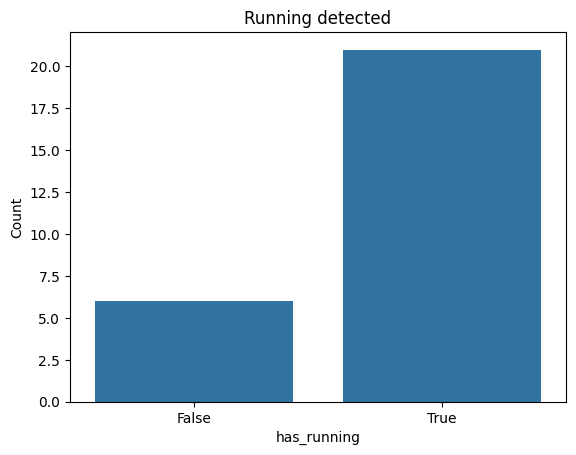

In [37]:
sns.countplot(x='has_running', data=df_running_detected)
plt.title('Running detected')
plt.ylabel('Count')
plt.show()

In [38]:
running_count = df_running_detected['has_running'].sum()
total_count = df_running_detected.shape[0]
percent_running = (running_count / total_count) * 100

In [39]:
print('Total percentage of determined runs: ', round(percent_running, 2), '%') 

Total percentage of determined runs:  77.78 %


## The accuracy of start and end time determination 
In this section, I compared the start and end times from both apps to evaluate how accurately WHOOP detects the beginning and end of a workout.

In [40]:
df.sort_values(by=['start_time_local', 'workout_start_time'], inplace=True)

In [41]:
df_overlapse_filter = df[df.intervals_overlap == True].copy()

In [42]:
print('df_overlapse_filter shape: ', len(df_overlapse_filter))
print('df_running_detected shape: ', len(df_running_detected))

df_overlapse_filter shape:  28
df_running_detected shape:  27


df_overlap_filter consists of more rows than df_running_detected, indicating that multiple rows may represent the same running session. Let's collapse all workouts that have the same activity type and where the end time of one workout is less than 1 minute before the start time of the next.

In [43]:
df_overlapse_filter['previous_workout_end_time'] = df_overlapse_filter['workout_end_time'].shift(1)

In [44]:
df_overlapse_filter['previous_workout_end_time'] = df_overlapse_filter['previous_workout_end_time'].fillna(df_overlapse_filter['workout_start_time'])

In [45]:
df_overlapse_filter.head()

,day,start_time,end_time,workout_start_time,workout_end_time,activity_name,timezone,start_time_local,end_time_local,intervals_overlap,previous_workout_end_time
2,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:09:10,2024-11-25 08:16:21,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True,2024-11-25 08:09:10
1,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:16:50,2024-11-25 08:34:24,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True,2024-11-25 08:16:21
5,2024-11-27,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856,2024-11-27 08:34:11,2024-11-27 09:03:14,Running,UTC+02:00,2024-11-27 08:34:11.392,2024-11-27 09:03:11.856,True,2024-11-25 08:34:24
8,2024-11-29,2024-11-29 06:47:45.262,2024-11-29 07:13:55.307,2024-11-29 08:47:45,2024-11-29 09:13:59,Running,UTC+02:00,2024-11-29 08:47:45.262,2024-11-29 09:13:55.307,True,2024-11-27 09:03:14
11,2024-12-04,2024-12-04 07:27:57.631,2024-12-04 07:27:57.631,2024-12-04 09:27:57,2024-12-04 09:56:44,Running,UTC+02:00,2024-12-04 09:27:57.631,2024-12-04 09:27:57.631,True,2024-11-29 09:13:59


In [46]:

df_overlapse_filter['shift_diff'] = (df_overlapse_filter['workout_start_time']- df_overlapse_filter['previous_workout_end_time']).dt.total_seconds()

In [47]:
df_overlapse_filter[df_overlapse_filter.shift_diff < 60]

,day,start_time,end_time,workout_start_time,workout_end_time,activity_name,timezone,start_time_local,end_time_local,intervals_overlap,previous_workout_end_time,shift_diff
2,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:09:10,2024-11-25 08:16:21,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True,2024-11-25 08:09:10,0.0
1,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:16:50,2024-11-25 08:34:24,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True,2024-11-25 08:16:21,29.0


As it is just one row I will merge it with previous one manually

In [48]:
df_overlapse_filter.loc[2, 'workout_end_time'] = df_overlapse_filter.loc[1, 'workout_end_time']
df_overlapse_filter = df_overlapse_filter.drop(1)

In [49]:
df_overlapse_filter.shape

(27, 12)

In [50]:
df_overlapse_filter.head()

,day,start_time,end_time,workout_start_time,workout_end_time,activity_name,timezone,start_time_local,end_time_local,intervals_overlap,previous_workout_end_time,shift_diff
2,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:09:10,2024-11-25 08:34:24,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True,2024-11-25 08:09:10,0.0
5,2024-11-27,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856,2024-11-27 08:34:11,2024-11-27 09:03:14,Running,UTC+02:00,2024-11-27 08:34:11.392,2024-11-27 09:03:11.856,True,2024-11-25 08:34:24,172787.0
8,2024-11-29,2024-11-29 06:47:45.262,2024-11-29 07:13:55.307,2024-11-29 08:47:45,2024-11-29 09:13:59,Running,UTC+02:00,2024-11-29 08:47:45.262,2024-11-29 09:13:55.307,True,2024-11-27 09:03:14,171871.0
11,2024-12-04,2024-12-04 07:27:57.631,2024-12-04 07:27:57.631,2024-12-04 09:27:57,2024-12-04 09:56:44,Running,UTC+02:00,2024-12-04 09:27:57.631,2024-12-04 09:27:57.631,True,2024-11-29 09:13:59,432838.0
14,2024-12-06,2024-12-06 06:51:44.199,2024-12-06 07:08:20.786,2024-12-06 08:51:44,2024-12-06 09:08:26,Running,UTC+02:00,2024-12-06 08:51:44.199,2024-12-06 09:08:20.786,True,2024-12-04 09:56:44,168900.0


Now, when the data is ready let's see the accuracy of workout time. 

In [51]:
df_overlapse_filter['start_diff'] = (df_overlapse_filter['start_time_local'] - pd.to_datetime(df_overlapse_filter['workout_start_time'])).dt.total_seconds()
df_overlapse_filter['end_diff'] = (df_overlapse_filter['end_time_local'] - pd.to_datetime(df_overlapse_filter['workout_end_time'])).dt.total_seconds()

In [52]:
df_overlapse_filter.head()

,day,start_time,end_time,workout_start_time,workout_end_time,activity_name,timezone,start_time_local,end_time_local,intervals_overlap,previous_workout_end_time,shift_diff,start_diff,end_diff
2,2024-11-25,2024-11-25 06:09:10.607,2024-11-25 06:34:21.631,2024-11-25 08:09:10,2024-11-25 08:34:24,Running,UTC+02:00,2024-11-25 08:09:10.607,2024-11-25 08:34:21.631,True,2024-11-25 08:09:10,0.0,0.607,-2.369
5,2024-11-27,2024-11-27 06:34:11.392,2024-11-27 07:03:11.856,2024-11-27 08:34:11,2024-11-27 09:03:14,Running,UTC+02:00,2024-11-27 08:34:11.392,2024-11-27 09:03:11.856,True,2024-11-25 08:34:24,172787.0,0.392,-2.144
8,2024-11-29,2024-11-29 06:47:45.262,2024-11-29 07:13:55.307,2024-11-29 08:47:45,2024-11-29 09:13:59,Running,UTC+02:00,2024-11-29 08:47:45.262,2024-11-29 09:13:55.307,True,2024-11-27 09:03:14,171871.0,0.262,-3.693
11,2024-12-04,2024-12-04 07:27:57.631,2024-12-04 07:27:57.631,2024-12-04 09:27:57,2024-12-04 09:56:44,Running,UTC+02:00,2024-12-04 09:27:57.631,2024-12-04 09:27:57.631,True,2024-11-29 09:13:59,432838.0,0.631,-1726.369
14,2024-12-06,2024-12-06 06:51:44.199,2024-12-06 07:08:20.786,2024-12-06 08:51:44,2024-12-06 09:08:26,Running,UTC+02:00,2024-12-06 08:51:44.199,2024-12-06 09:08:20.786,True,2024-12-04 09:56:44,168900.0,0.199,-5.214


In [53]:
print('Mean absolute error of time difference for start time: ', round(df_overlapse_filter.start_diff.abs().mean(), 2), 'seconds')
print('Mean absolute error of time difference for end time: ', round(df_overlapse_filter.end_diff.abs().mean(), 2), 'seconds')

Mean absolute error of time difference for start time:  73.73 seconds
Mean absolute error of time difference for end time:  490.11 seconds


In [54]:
print('Median of time difference for start time: ', round(df_overlapse_filter.start_diff.abs().median(), 2), 'seconds')
print('Median of time difference for end time: ', round(df_overlapse_filter.end_diff.abs().median(), 2), 'seconds')

Median of time difference for start time:  31.77 seconds
Median of time difference for end time:  142.47 seconds


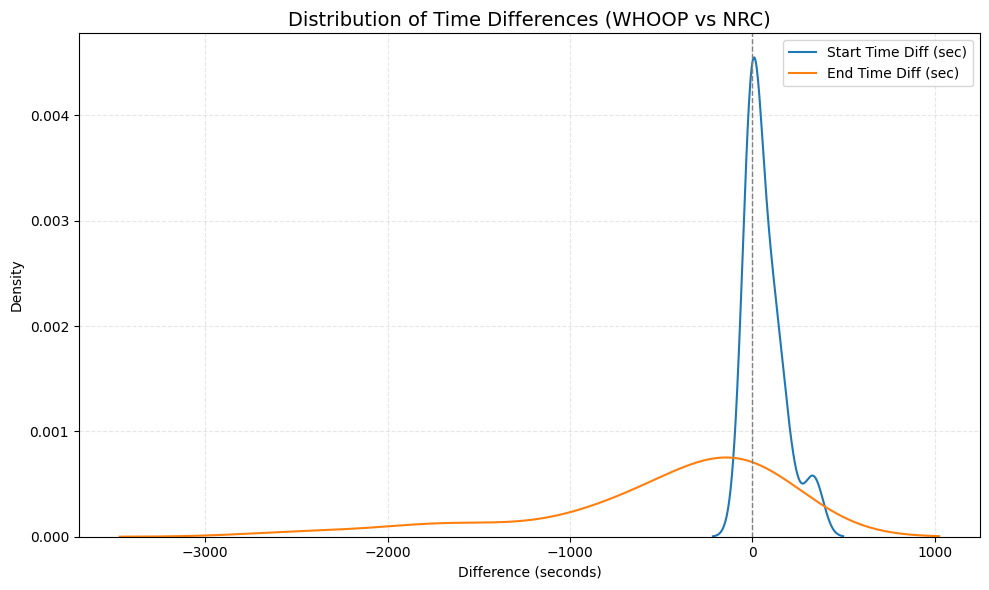

In [55]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_overlapse_filter['start_diff'], label='Start Time Diff (sec)')
sns.kdeplot(df_overlapse_filter['end_diff'], label='End Time Diff (sec)')

plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Distribution of Time Differences (WHOOP vs NRC)", fontsize=14)
plt.xlabel("Difference (seconds)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

Start time is determined mutch better than the end time. 

In [56]:
print('Number of records where whoop predicted later workout start ', (df_overlapse_filter['start_diff'] > 0).sum()) 
print('Number of records where whoop predicted earlier workout start ', (df_overlapse_filter['start_diff'] < 0).sum())

Number of records where whoop predicted later workout start  24
Number of records where whoop predicted earlier workout start  3


In [57]:
print('Number of records where whoop predicted later workout end ', (df_overlapse_filter['end_diff'] > 0).sum())  
print('Number of records where whoop predicted later workout end ', (df_overlapse_filter['end_diff'] < 0).sum())

Number of records where whoop predicted later workout end  0
Number of records where whoop predicted later workout end  27


## WHOOP Automatic Workout Detection Check. Conclusion 
As part of my personal challenge to run 100 km in 100 days, I tracked my workouts using both Nike Running Club and WHOOP band. I wanted to see how well WHOOP detects running sessions compared to manually logged runs. And is this data trust trustworthy. 

WHOOP performs well in detecting that a workout took place — in **100%** of the cases, it recognized an activity. In **77%** of those, it correctly identified the activity as running.

However, the start and especially the end times were not always accurate. In all cases, WHOOP showed the **workout ending later than the actual finish** time in NRC. This likely happens because WHOOP uses heart rate recovery to decide when a workout ends — and heart rate can stay elevated for several minutes after a run.

In my opinion, WHOOP’s detection would be more accurate if it allowed users to manually adjust the start and end times directly from the device. Right now, that’s not possible because the WHOOP band doesn’t have a screen or buttons.

# Work in progress: Sleep and Workout Insights 
**Null hypothesis:**
There is no significant relationship between a run’s pace or duration and the recovery score the next day.

**Alternative hypothesis:**
Pace and/or duration have a significant impact on the recovery score.